<h4> The code represents the implementation of a mountain clustering method.

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

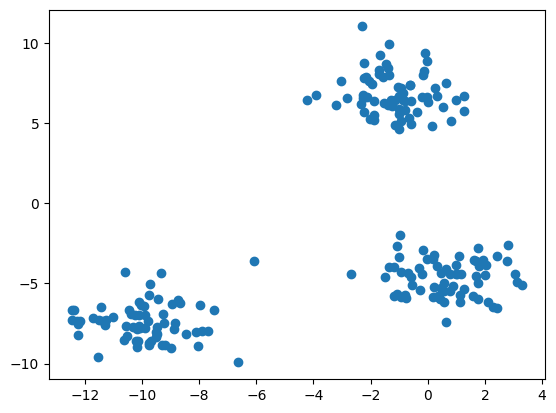

In [1227]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [1339]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MountainClustering():
    def __init__(self, X, space=20, b=2, sigma=2, n_clusters=3, threshold = 1.5):
        self.X = X
        self.space = space
        self.b = b
        self.sigma = sigma
        self.n_clusters = n_clusters
        self.clusters = []
        self.threshold = threshold

    def grid(self, X, space):
        x_space = np.linspace(min(X[:, 0]), max(X[:, 0]), space)
        y_space = np.linspace(min(X[:, 1]), max(X[:, 1]), space)
        xv, yv = np.meshgrid(x_space, y_space)
        plt.plot(xv, yv, marker='o', color='k', linestyle='none')
        plt.show()
        return xv, yv

    def g_c(self, X, b, sigma):
        xv, yv = self.grid(X, self.space)
        X_gestosc = []
        for ele in range(len(X[:, 0])):
            odleglosc_x = np.repeat(X[:, 0][ele], xv.shape[0]) - xv
            odleglosc_y = np.repeat(X[:, 1][ele], yv.shape[0]) - yv

            distance = np.sqrt((odleglosc_x)**2 + (odleglosc_y)**2)

            gc = np.exp(-((distance) ** (2 * b)) / (2 * (sigma ** 2)))
            X_gestosc.append(np.sum(gc))
        self.clusters.append(np.array(X_gestosc))
        return X_gestosc

    def plot(self, X, gc):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        x_axis = X[:, 0]
        y_axis = X[:, 1]
        z_axis = gc
        ax.scatter3D(x_axis, y_axis, z_axis, c=z_axis, cmap='Greens')

    def g_c_new(self, X, gc, b, sigma):
        sigma=self.sigma
        X_gestosc = []
        max_index = np.argmax(gc)
        max_c_orig = X[max_index]
        print(max_index)
        print(max_c_orig)
        for ele in range(len(gc)):
            odleglosc_c_x = X[:, 0][ele] - max_c_orig[0]
            odleglosc_c_y = X[:, 1][ele] - max_c_orig[1]
            distance = np.sqrt((odleglosc_c_x)**2 + (odleglosc_c_y)**2)
            gc_new = gc[ele] - gc[max_index] * np.exp(-((distance) ** (2 * b)) / (2 * ((sigma*10) ** 2)))
            X_gestosc.append(gc_new)
        self.clusters.append(np.array(X_gestosc))
        return X_gestosc
    
    def final_plot(self, X):
        n_clusters=self.n_clusters
        clusters_array = np.vstack(self.clusters)
        reshaped_clusters = clusters_array.T.reshape(-1, n_clusters+1)
        clusters=[]
        for row in reshaped_clusters:
            for idx in range(len(row)):
                if row[idx]-np.abs(row[idx+1])>self.threshold:
                    clusters.append(idx)
                    break
                    
        plt.scatter(X[:, 0], X[:, 1], c= clusters)
        plt.show()
                        
    def fit(self):
        gc = self.g_c(self.X, self.b, self.sigma)
        self.plot(self.X, gc)
        iterations = 0
        while iterations < self.n_clusters:
            gc = self.g_c_new(self.X, gc, self.b, self.sigma)
            self.plot(self.X, gc)
            iterations += 1

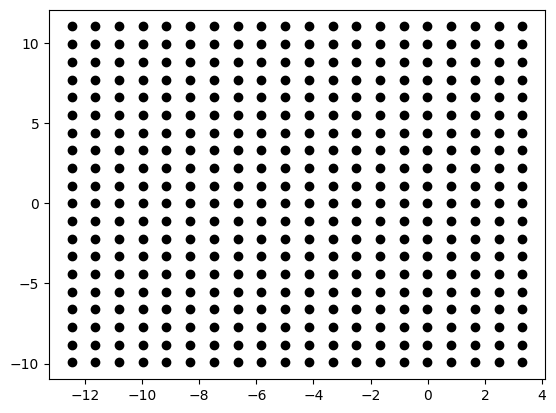

33
[-2.12696405  6.6362505 ]
75
[-9.4847915  -7.72710964]
182
[ 1.15351238 -4.41635404]


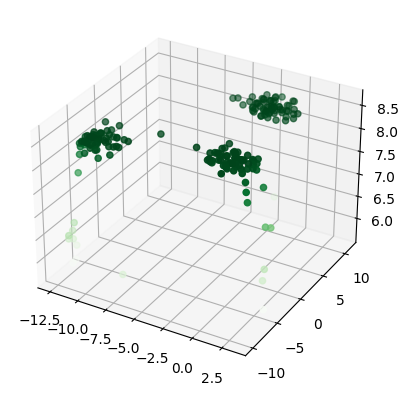

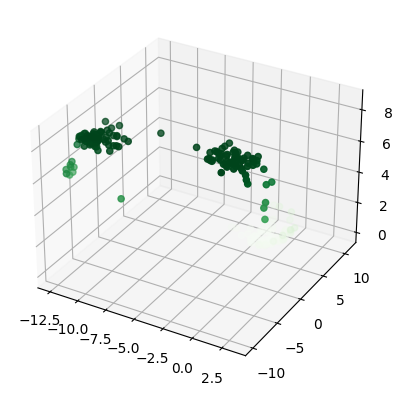

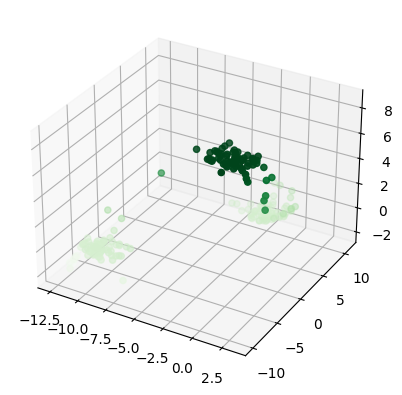

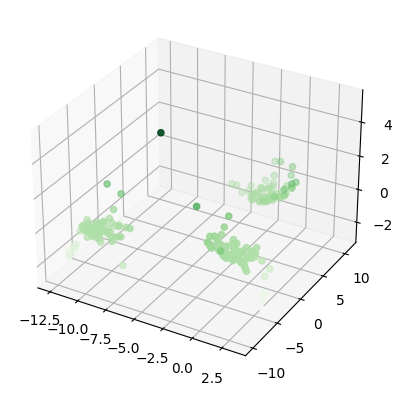

In [1340]:
model = MountainClustering(X)
gorski_model.fit()

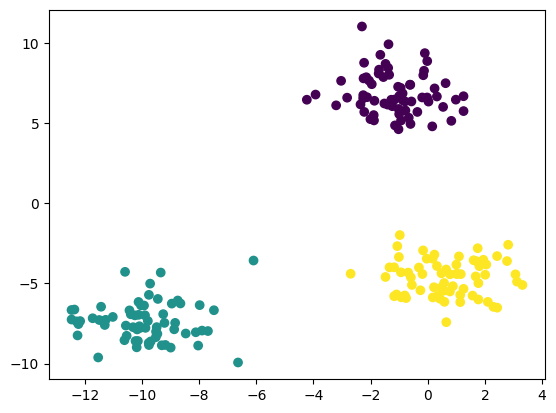

In [1341]:
gorski_model.final_plot(X)